In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [3]:
food = pd.read_csv('./Data/seogyodong+korean-ratio+franchise+hint.csv')
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈,clustering
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,1,0
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0,0,0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0,0,0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0,0,0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0,0,0


### clustering 한게 어디에 특징이 있는지 알아보기

In [4]:
zero = food[food['clustering'] == 0]
one = food[food['clustering'] == 1]

In [30]:
def certify(colname):
    table=food.pivot_table(index=[colname],columns=['clustering'],aggfunc='size')

    colors = sns.color_palette('hls',len(food[colname].unique()))

    plt.style.use('ggplot')

    fig ,axs = plt.subplots(1,2,figsize=(25,20))

    table[0].plot(
        kind='pie',
        autopct='%.2f%%', # 소수 두째짜리까지 나타내고 %를 붙인다. 
        startangle=90,
        colors=colors, # 파이별 칠할 색깔
        ax=axs[0]
    )

    table[1].plot(
        kind='pie',
        autopct='%.2f%%', # 소수 두째짜리까지 나타내고 %를 붙인다. 
        startangle=90,
        colors=colors, # 파이별 칠할 색깔
        ax=axs[1]
    )

    plt.show()

    return table

#### 분기 확인하기

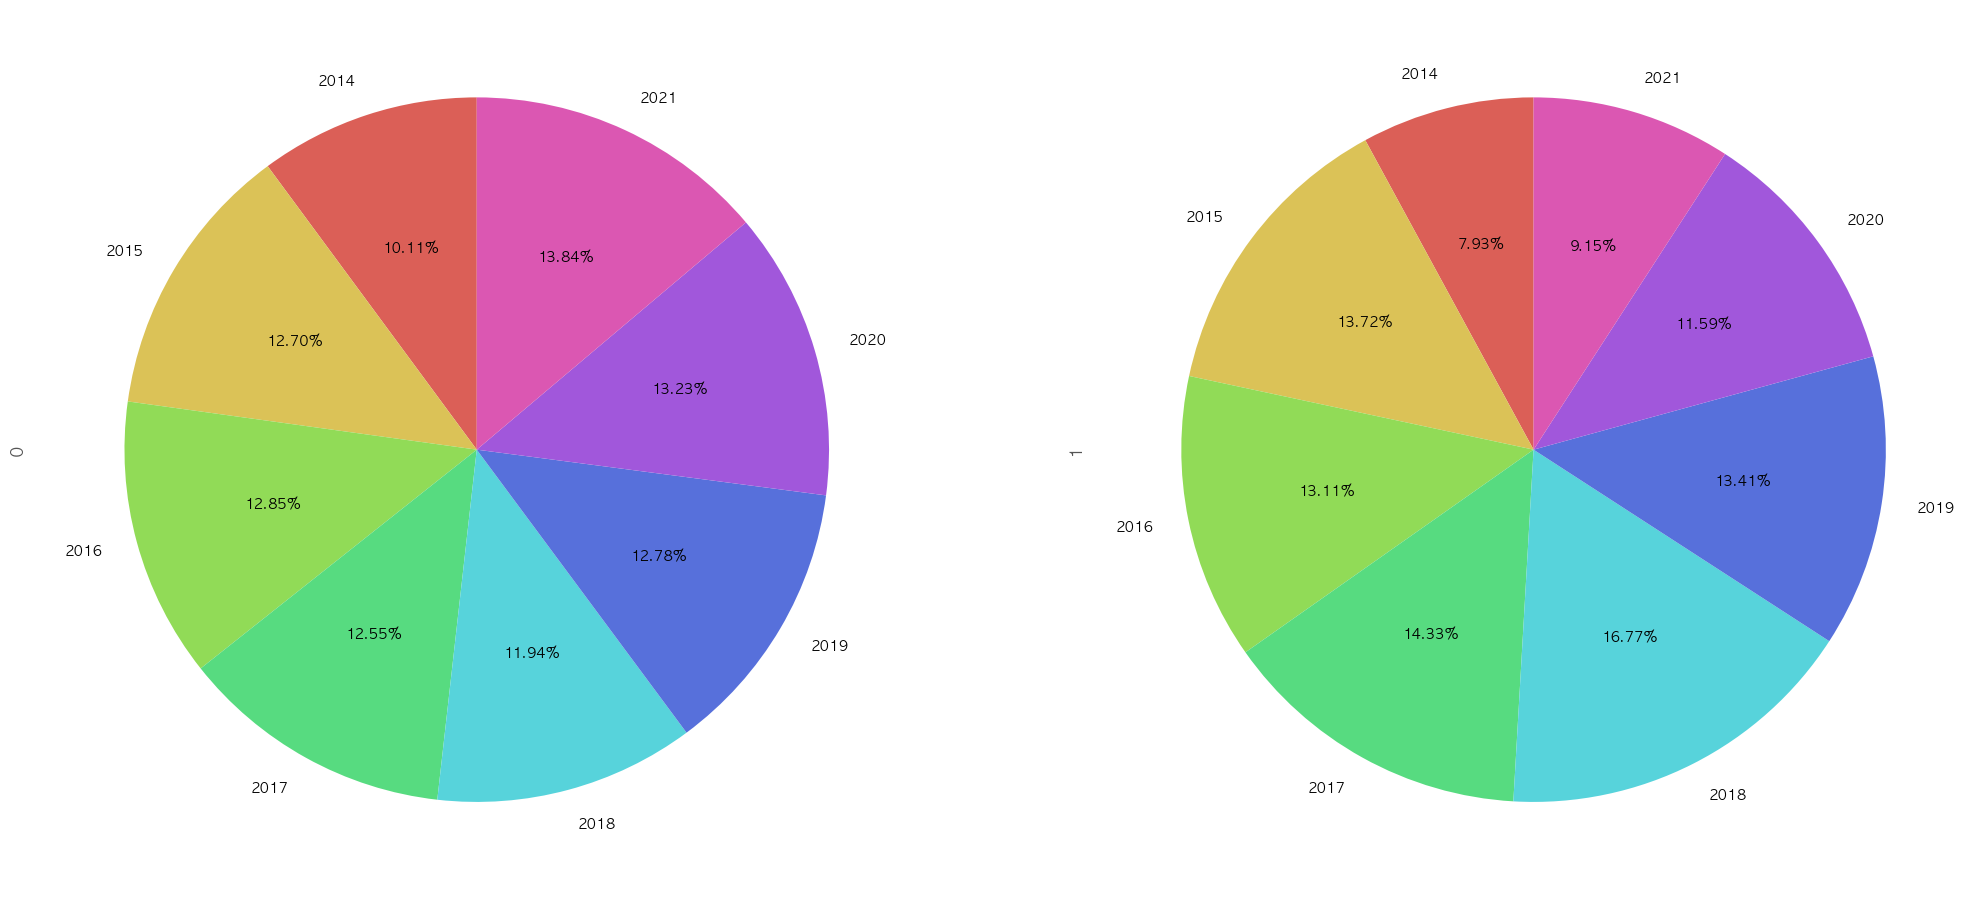

In [35]:
year=certify('기준_년_코드')

### 년도 확인해보기

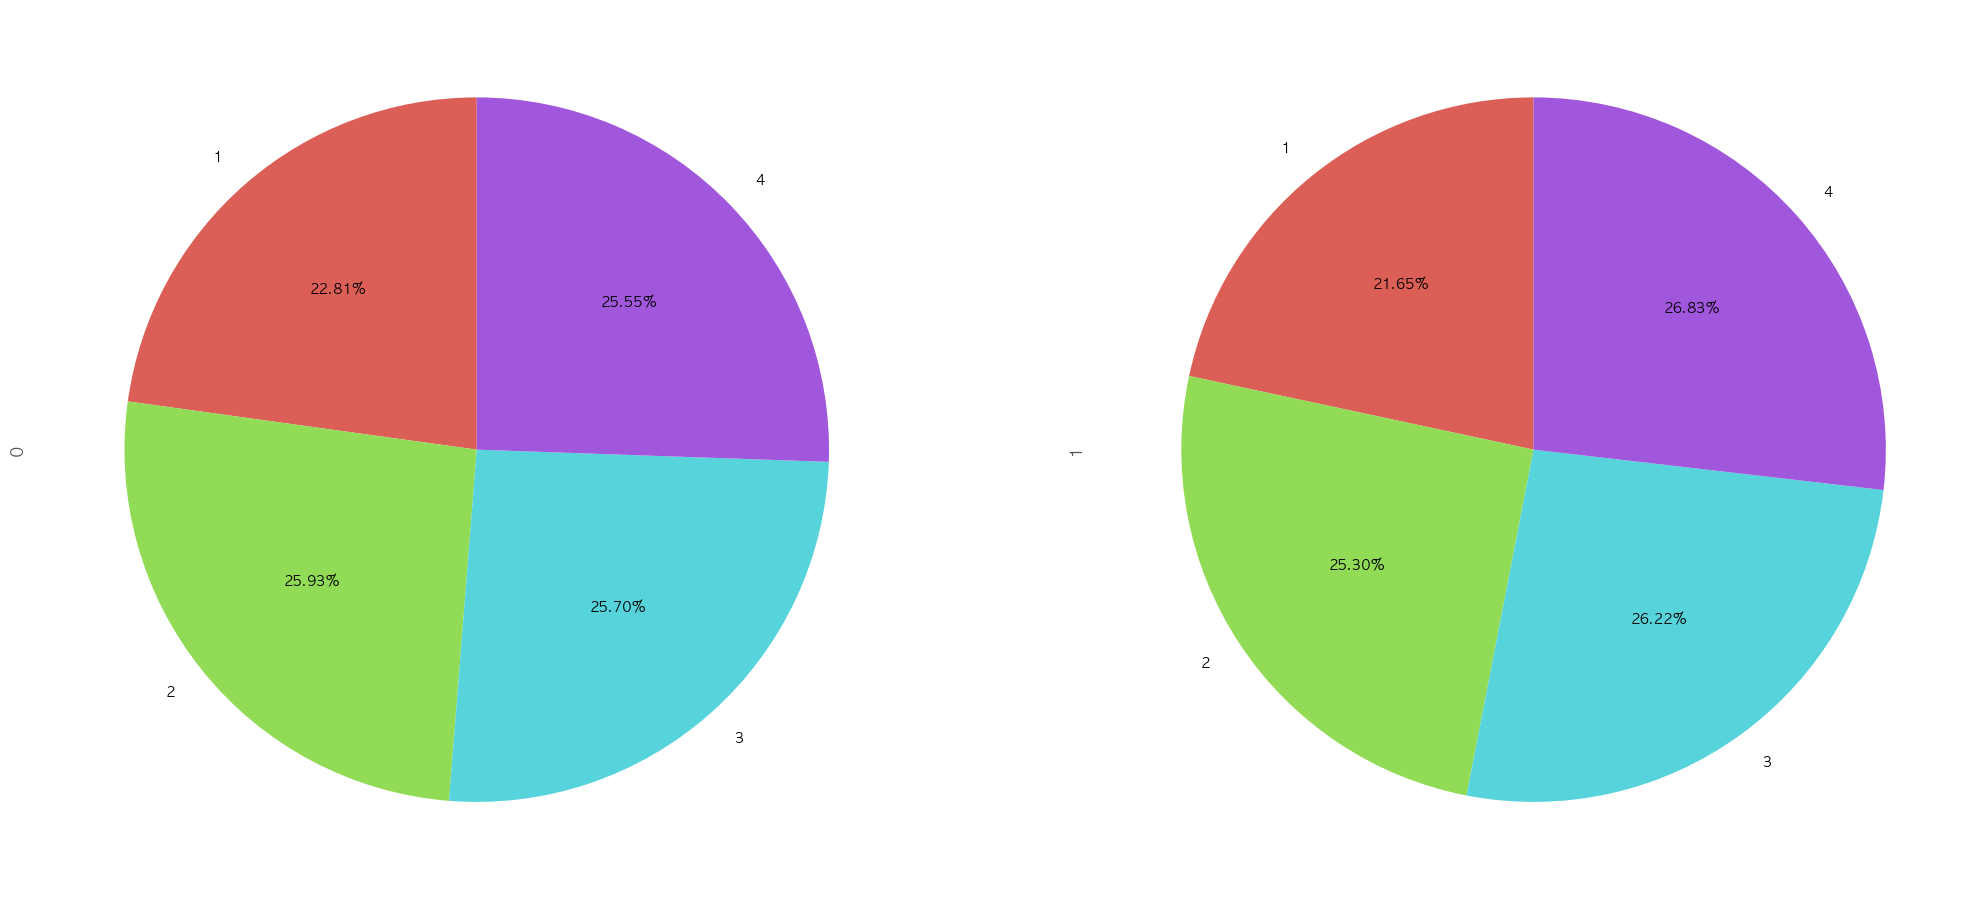

In [36]:
div=certify('기준_분기_코드')

In [43]:
food['동교로17길']=[1 if i == '동교로17길' else 0 for i in food['상권_코드_명']]

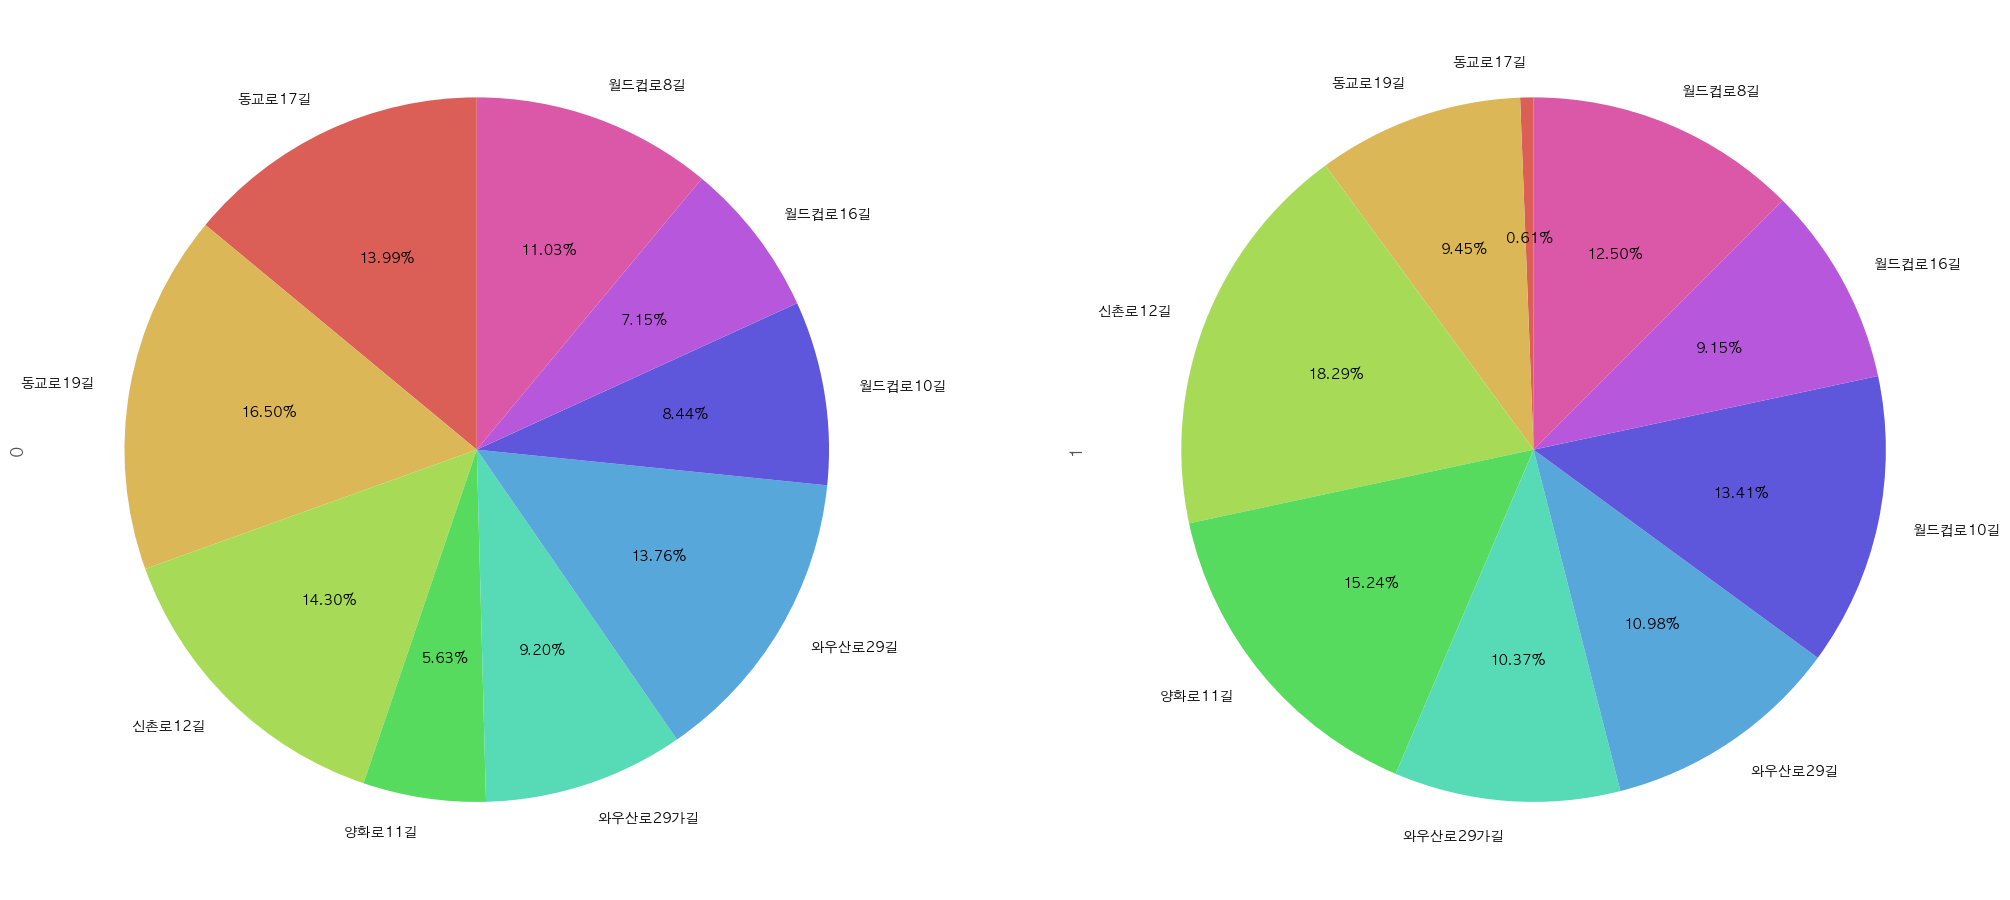

In [37]:
# 상권 코드 명으로 알아보기
code=certify('상권_코드_명') #동교로 17길

In [59]:
food['제과중국치킨패푸']=[1 if i in ['제과점','중국음식점','치킨전문점','패스트푸드점'] else 0 for i in food['서비스_업종_코드_명']]

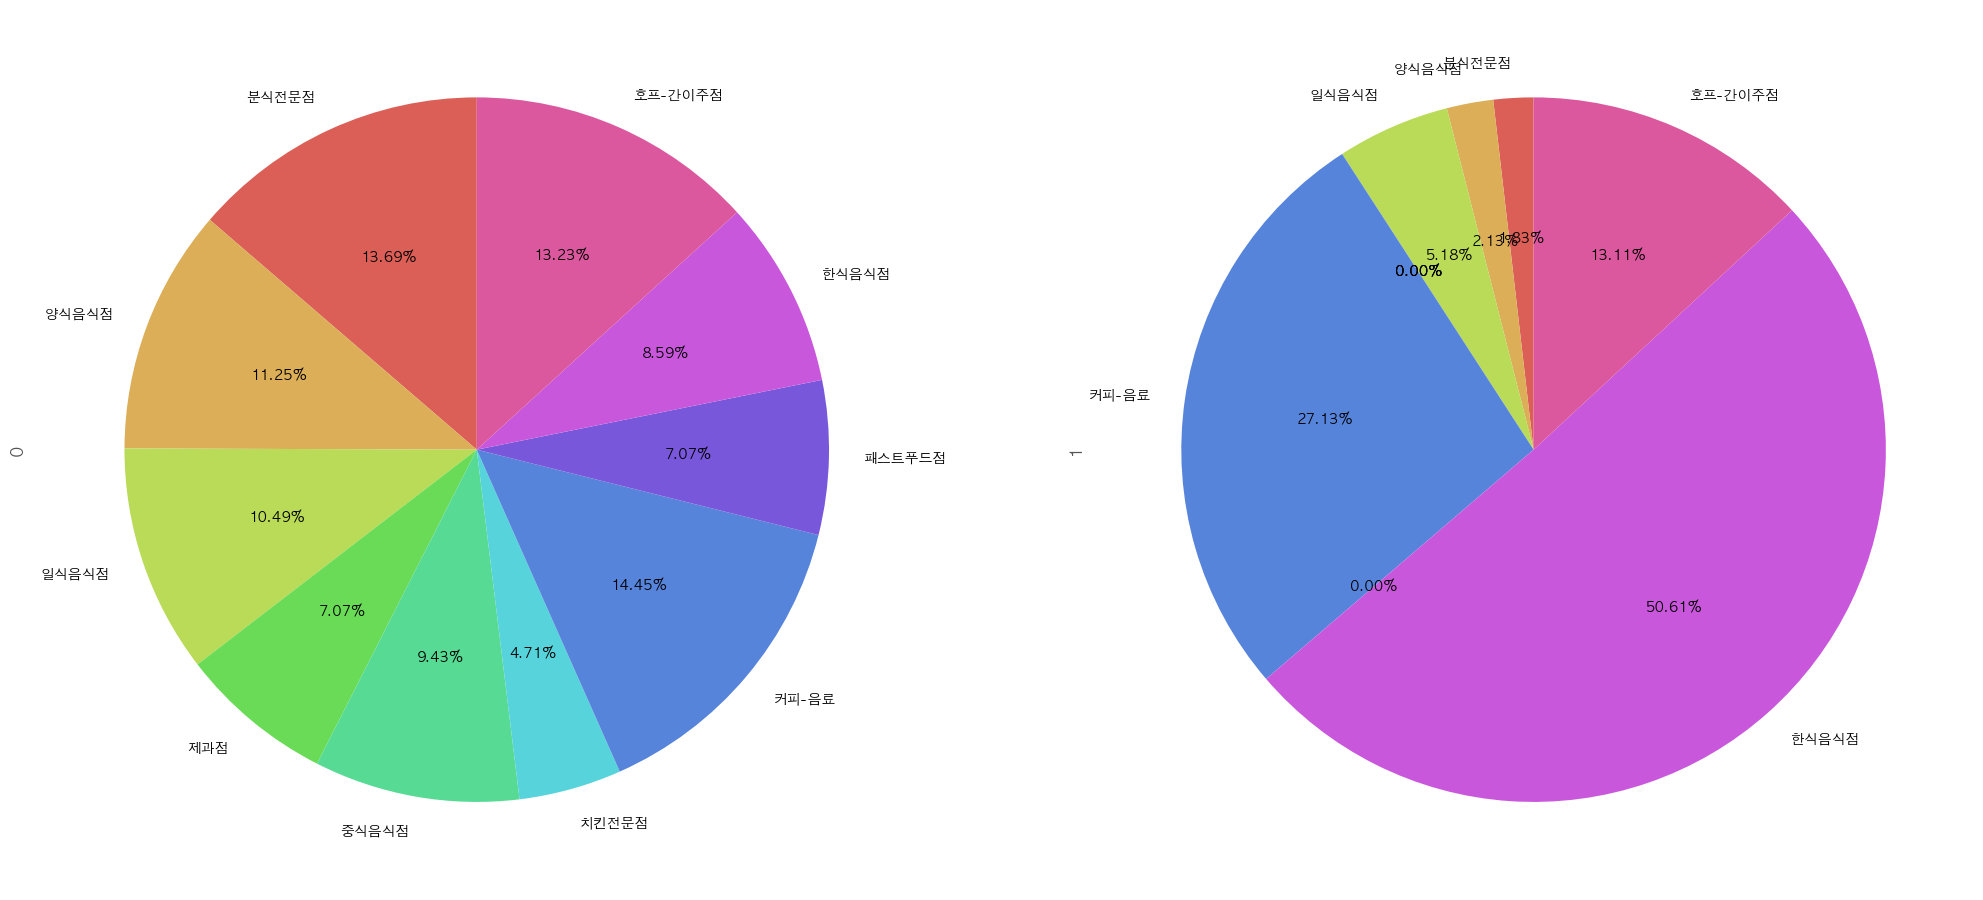

In [60]:
# 서비스 업종별
service=certify('서비스_업종_코드_명')
# 한식음식점 
# 제과점 , 중식음식점 , 치킨전문점 , 패스트푸드점

In [61]:
service

In [84]:
food['log점포수']=np.log1p(food['점포수'])
food['지수점포수']=e**(food['점포수'])

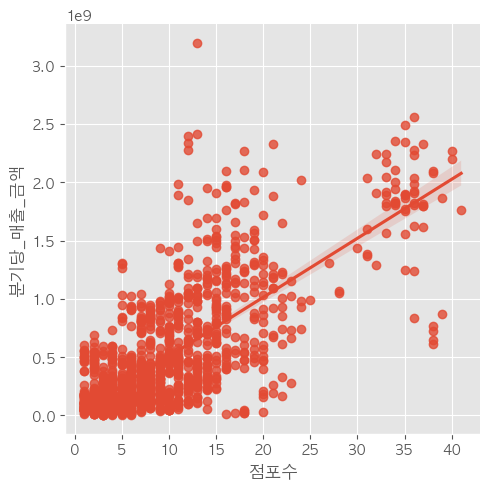

In [85]:
sns.lmplot(
    x='점포수',
    y='분기당_매출_금액',
    data=food
)

plt.show()

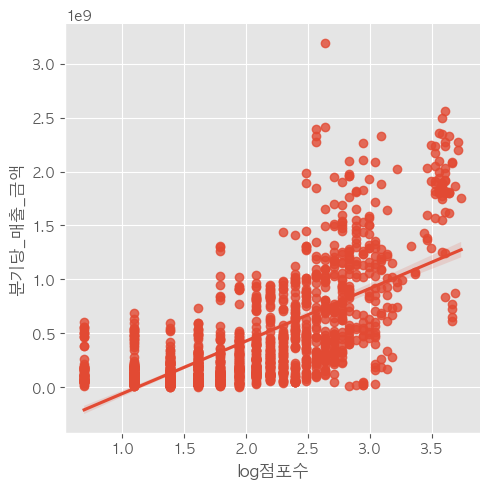

In [86]:
sns.lmplot(
    x='log점포수',
    y='분기당_매출_금액',
    data=food
)

plt.show()

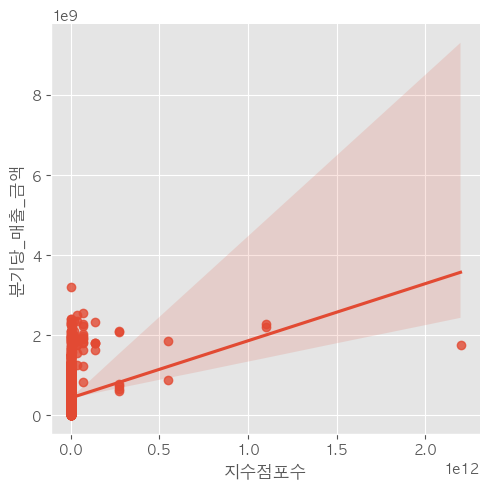

In [87]:
sns.lmplot(
    x='지수점포수',
    y='분기당_매출_금액',
    data=food
)

plt.show()

In [88]:
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈,clustering,동교로17길,제과중국치킨패푸,log점포수,지수점포수
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,1,0,1,0,2.708050,16384
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0,0,0,1,0,0.693147,2
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0,0,0,1,0,1.386294,8
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0,0,0,1,1,1.386294,8
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0,0,0,1,0,1.945910,64


In [89]:
feature = food[['점포수','한식음식점여부','프랜차이즈','동교로17길','제과중국치킨패푸','log점포수','지수점포수']]
target = food['분기당_매출_금액']

In [90]:
from module.default import basic
basic(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.6868732360516099
test :  0.6248180988935704
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.6341294003518503
test :  0.6110651462532662
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.6341235064839701
test :  0.6111914903715121
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.6341294003686693
test :  0.6110656776349838
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.7328229484924556
test :  0.6524550252658899
--------------------------------------------------
